## Importing necessary libriaries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os 

np.random.seed(1)

## Ornstein-Uhlenbeck process

In [10]:
def ornstein_uhlenbeck_noise(mu, sigma, theta, dt, tmax, x0):
    
    t = np.linspace(0,tmax,int(1.0/dt))
    
    x = np.zeros_like(t)
    
    x[0] = x0
    
    for i in range(t.shape[0]-1):
        x[i+1]= x[i] + theta*(mu-x[i])*dt + sigma*np.sqrt(dt)*np.random.normal(size=1)
    
    return t, x

## Simulation of OU process for THROTTLE and STEER actions

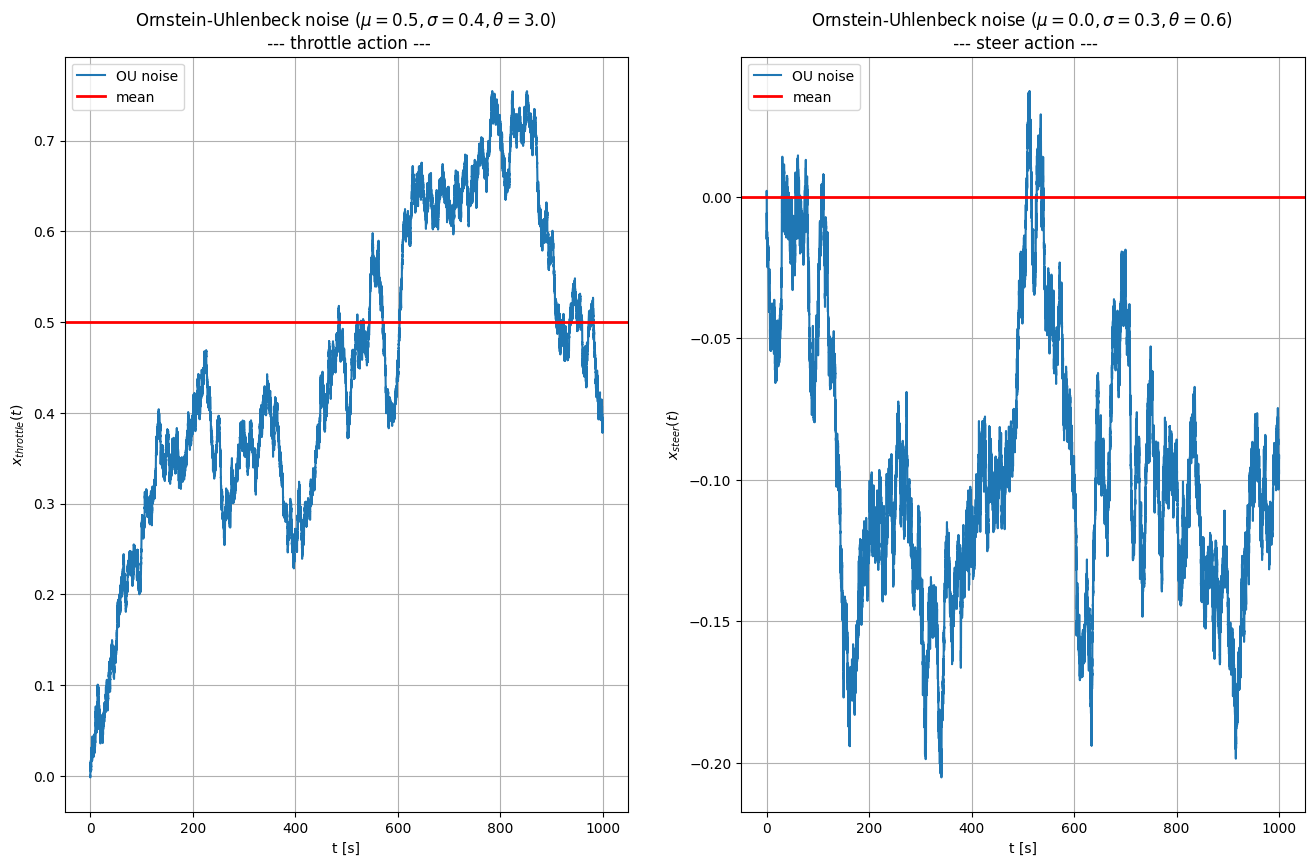

<Figure size 432x288 with 0 Axes>

In [24]:
mu_throttle = 0.5
sigma_throttle = 0.4
theta_throttle = 3.0

t_throttle, x_throttle = ornstein_uhlenbeck_noise(mu=mu_throttle, sigma=sigma_throttle, theta=theta_throttle, dt=0.00001, tmax=1000, x0=0.0)

mu_steer = 0.0
sigma_steer = 0.3
theta_steer = 0.6

t_steer, x_steer = ornstein_uhlenbeck_noise(mu=mu_steer, sigma=sigma_steer, theta=theta_steer, dt=0.00001, tmax=1000, x0=0.0)
    
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(16,10), dpi=100)
ax = axes.ravel()

ax[0].plot(t_throttle,x_throttle, label='OU noise')
ax[0].axhline(mu_throttle, color='red', linewidth=2.0, label='mean')
ax[0].set_title('Ornstein-Uhlenbeck noise ($\\mu='+ str(mu_throttle) +', \\sigma='+ str(sigma_throttle) +', \\theta='+ str(theta_throttle) +')$ \n --- throttle action ---')
ax[0].set_xlabel('t [s]')
ax[0].set_ylabel('$x_{throttle}(t)$')
ax[0].legend(loc='upper left')
ax[0].grid()

ax[1].plot(t_steer,x_steer, label='OU noise')
ax[1].axhline(mu_steer, color='red', linewidth=2.0, label='mean')
ax[1].set_title('Ornstein-Uhlenbeck noise ($\\mu='+ str(mu_steer) +', \\sigma='+ str(sigma_steer) +', \\theta='+ str(theta_steer) +')$ \n --- steer action ---')
ax[1].set_xlabel('t [s]')
ax[1].set_ylabel('$x_{steer}(t)$')
ax[1].legend(loc='upper left')
ax[1].grid()

plt.show()
plt.tight_layout()
fig.savefig(os.getcwd()+'/ou_action_noise.png', facecolor = 'white', bbox_inches='tight')